## Import library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Import table

In [4]:
# Get data from Daily_Country_Wise_Confirmed_Cases
df_daily_country = pd.read_csv('Daily_Country_Wise_Confirmed_Cases.csv')

# Get data from Worldwide_Case_Detection_Timeline
df_worldwide = pd.read_csv('Worldwide_Case_Detection_Timeline.csv')

# Get data from Monkey_Pox_Cases_Worldwide
df_monkey_pox_cases = pd.read_csv('Monkey_Pox_Cases_Worldwide.csv')

/var/folders/lb/gbzzh3xs2w5bhk44y2z2zsf80000gn/T/ipykernel_25053/200544256.py:5: DtypeWarning: Columns (2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_worldwide = pd.read_csv('Worldwide_Case_Detection_Timeline.csv')


In [5]:
# Display the Initial rows in Daily_Country_Wise_Confirmed_Cases file
print("Initial rows of Daily_Country_Wise_Confirmed_Cases:")
df_daily_country.head()

Initial rows of Daily_Country_Wise_Confirmed_Cases:


,Country,2022-01-31,2022-02-17,2022-02-28,2022-03-04,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,...,2022-09-13,2022-09-14,2022-09-15,2022-09-16,2022-09-17,2022-09-18,2022-09-19,2022-09-20,2022-09-21,2022-09-22
0,Nigeria,3,0,1,0,6,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
1,Cameroon,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central African Republic,0,0,0,2,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Republic of Congo,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,England,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,29,0,0


In [6]:
# Display the Initial rows in Worldwide_Case_Detection_Timeline file
print("Initial rows of Worldwide_Case_Detection_Timeline:")
df_worldwide.head()

Initial rows of Worldwide_Case_Detection_Timeline:


,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
4,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN


In [7]:
# Display the Initial rows in Monkey_Pox_Cases_Worldwide file
print("Initial rows of Monkey_Pox_Cases_Worldwide:")
df_monkey_pox_cases.head()

Initial rows of Monkey_Pox_Cases_Worldwide:


,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,3412.0,0.0,5.0,2.0,7.0
1,Portugal,908.0,0.0,0.0,0.0,34.0
2,Spain,7083.0,0.0,13.0,2.0,0.0
3,United States,24403.0,0.0,4.0,41.0,11.0
4,Canada,1388.0,12.0,1.0,5.0,0.0


In [8]:
# Cast the data columns to Datetime object series
date_columns = pd.to_datetime(df_daily_country.columns[1:])

# Add the the cast data column to the origin table in the Date format
df_daily_country.columns = ['Country'] + date_columns.astype(str).tolist()

# Cast the date periods to Month
month_columns = date_columns.to_period("M")

# Sum the number of cases per month
monthly_data = df_daily_country.iloc[:, 1:].groupby(month_columns, axis=1).sum()
monthly_data.loc['Total'] = monthly_data.sum()

# Add the country with the number of cases per month
monthly_country = pd.concat([df_daily_country[['Country']], monthly_data], axis=1)

# Add the total of cases per country
country_total = monthly_data.sum(axis=1)
monthly_country['Total_Country'] = country_total

/var/folders/lb/gbzzh3xs2w5bhk44y2z2zsf80000gn/T/ipykernel_25053/2152336665.py:11: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  monthly_data = df_daily_country.iloc[:, 1:].groupby(month_columns, axis=1).sum()


In [9]:
monthly_country

,Country,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,Total_Country
0,Nigeria,3,1,6,5,6,39,97,120,0,277
1,Cameroon,0,3,0,0,0,3,1,0,0,7
2,Central African Republic,0,0,2,4,2,0,0,0,0,8
3,Republic of Congo,0,0,0,2,0,0,1,0,0,3
4,England,0,0,0,0,183,1002,1251,821,155,3412
...,...,...,...,...,...,...,...,...,...,...,...
108,Guam,0,0,0,0,0,0,0,0,1,1
109,Ukraine,0,0,0,0,0,0,0,0,2,2
110,Bahrain,0,0,0,0,0,0,0,0,1,1
111,China,0,0,0,0,0,0,0,0,1,1


### 1. Progression of the cases over the year

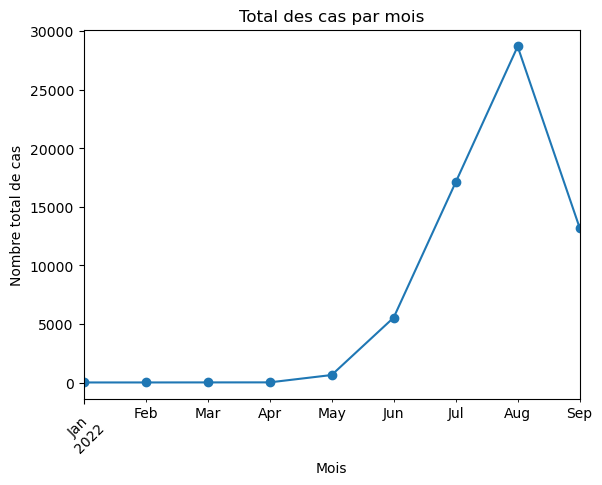

In [11]:
# Plot with Matplot
monthly_data.loc['Total'].plot(kind='line', marker='o')
plt.title('Total des cas par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre total de cas')
#plt.grid(True)
plt.xticks(rotation=45)
plt.show()

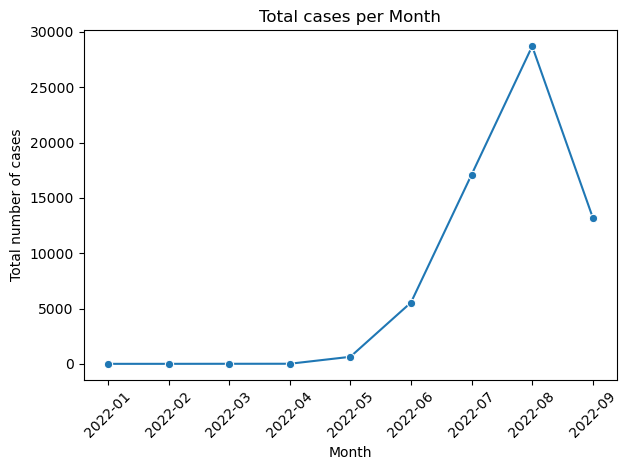

In [12]:
# Format data for seaborn
total_cases = monthly_data.loc['Total']
total_cases_df = total_cases.reset_index()
total_cases_df.columns = ['Month', 'Totals']
total_cases_df['Month'] = total_cases_df['Month'].astype('str')


# Plot with seaborn
sns.lineplot(x='Month', y='Totals', data=total_cases_df, marker='o')
plt.title('Total cases per Month')
plt.xlabel('Month')
plt.ylabel('Total number of cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Countries with the biggest progression

In [16]:
# Remove the Total from the analyses
country_total_df = monthly_country.iloc[:-1]
country_total_df = country_total_df.drop('Total_Country', axis=1)

#Get top countries for each month (columns) based on the country (rows)
country_total_df.set_index('Country', inplace=True)
max_countries = country_total_df.idxmax()

#Format for seaborn plot
max_countries = max_countries.reset_index()
max_countries.columns = ['Month', 'Top_Country']
max_countries['Month'] = max_countries['Month'].astype('str')

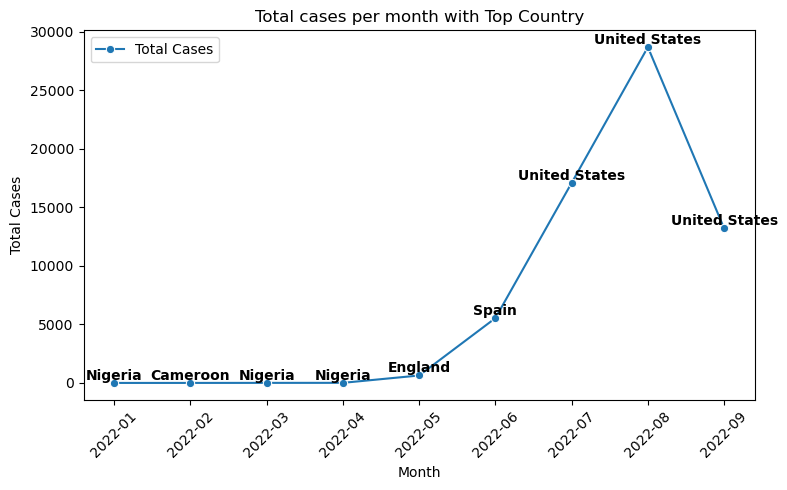

In [21]:
df = pd.merge(max_countries, total_cases_df, on='Month')

plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='Month', y='Totals', marker='o', label='Total Cases')

# Add Country to each point
for i in range(len(df)):
    plt.text(x=df['Month'][i], y=df['Totals'][i], s=df['Top_Country'][i], ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.title('Total cases per month with Top Country')
plt.tight_layout()
plt.show()

### 3. Top 10 countries with the Most Cases over the year

In [24]:
#Get the interesting data Country & Total
country_total_df = monthly_country[['Country','Total_Country']]

#Remove last lign (sum of the Total Country)
country_total_df = country_total_df.iloc[:-1]

# Sort by the total cases per country, order by DESC, limit 10
country_total_df = country_total_df.sort_values(by='Total_Country', ascending=False).head(10)

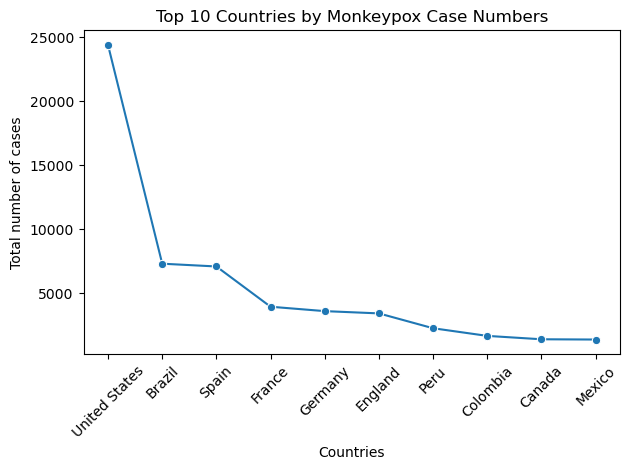

In [25]:
# Plot with seaborn
sns.lineplot(x='Country', y='Total_Country', data=country_total_df, marker='o')
plt.title('Top 10 Countries by Monkeypox Case Numbers')
plt.xlabel('Countries')
plt.ylabel('Total number of cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. Countries with the most confirmed cases

In [27]:
df_monkey_pox_cases

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,3412.0,0.0,5.0,2.0,7.0
1,Portugal,908.0,0.0,0.0,0.0,34.0
2,Spain,7083.0,0.0,13.0,2.0,0.0
3,United States,24403.0,0.0,4.0,41.0,11.0
4,Canada,1388.0,12.0,1.0,5.0,0.0
...,...,...,...,...,...,...
124,Central African Republic,8.0,9.0,0.0,0.0,0.0
125,Republic of Congo,3.0,5.0,0.0,0.0,0.0
126,Cameroon,7.0,27.0,0.0,0.0,0.0
127,Liberia,2.0,0.0,0.0,0.0,0.0


In [28]:
df_monkey_pox_cases['Proportion_Suspected_Cases'] = (df_monkey_pox_cases['Suspected_Cases'] / df_monkey_pox_cases['Confirmed_Cases'].replace(0, pd.NA)) * 100
df_monkey_pox_cases['Proportion_Hospitalized'] = (df_monkey_pox_cases['Hospitalized'] / df_monkey_pox_cases['Confirmed_Cases'].replace(0, pd.NA)) * 100
df_monkey_pox_cases

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,Proportion_Suspected_Cases,Proportion_Hospitalized
0,England,3412.0,0.0,5.0,2.0,7.0,0.0,0.146542
1,Portugal,908.0,0.0,0.0,0.0,34.0,0.0,0.0
2,Spain,7083.0,0.0,13.0,2.0,0.0,0.0,0.183538
3,United States,24403.0,0.0,4.0,41.0,11.0,0.0,0.016391
4,Canada,1388.0,12.0,1.0,5.0,0.0,0.864553,0.072046
...,...,...,...,...,...,...,...,...
124,Central African Republic,8.0,9.0,0.0,0.0,0.0,112.5,0.0
125,Republic of Congo,3.0,5.0,0.0,0.0,0.0,166.666667,0.0
126,Cameroon,7.0,27.0,0.0,0.0,0.0,385.714286,0.0
127,Liberia,2.0,0.0,0.0,0.0,0.0,0.0,0.0


/var/folders/lb/gbzzh3xs2w5bhk44y2z2zsf80000gn/T/ipykernel_25053/2679333014.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Proportion_Suspected_Cases', y='Country', data=df_propotions_suspected_cases, palette="viridis")  # kde=True ajoute une courbe de densité


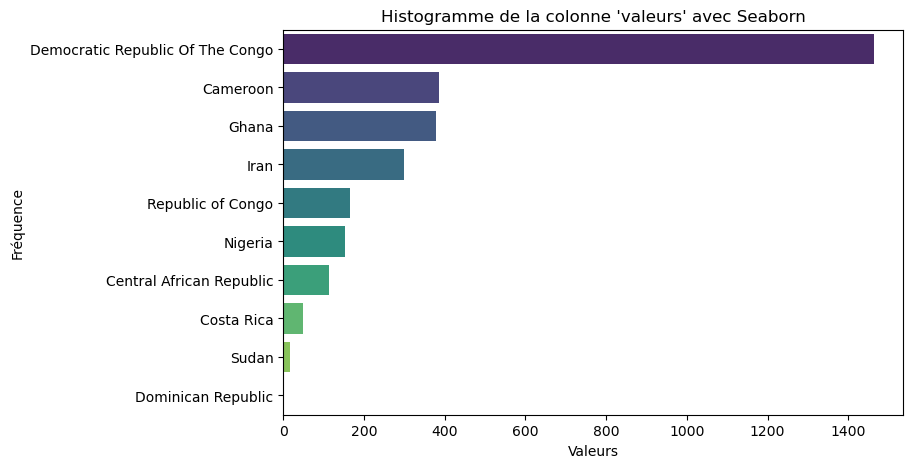

In [32]:
df_propotions_suspected_cases = df_monkey_pox_cases[['Country','Proportion_Suspected_Cases']]
df_propotions_suspected_cases = df_propotions_suspected_cases.sort_values(by='Proportion_Suspected_Cases', ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x='Proportion_Suspected_Cases', y='Country', data=df_propotions_suspected_cases, palette="viridis")  # kde=True ajoute une courbe de densité
plt.title("Histogramme de la colonne 'valeurs' avec Seaborn")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.show()

<Axes: xlabel='Valeur', ylabel='Country'>

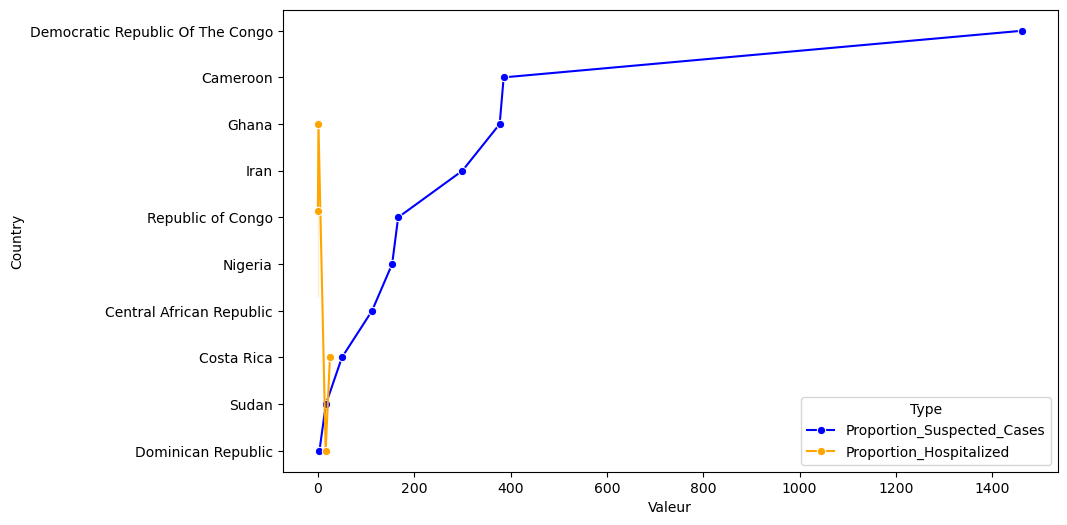

In [70]:
# Transformation des données pour seaborn
df_monkey_pox_case_top = df_monkey_pox_cases.sort_values(by='Proportion_Suspected_Cases', ascending=False).head(10)
df_melted = df_monkey_pox_case_top.melt(id_vars='Country', value_vars=['Proportion_Suspected_Cases', 'Proportion_Hospitalized'], var_name='Type', value_name='Valeur')


# Création du graphique en ligne avec seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Valeur', y='Country', hue='Type', data=df_melted, marker='o', palette=['blue', 'orange'])


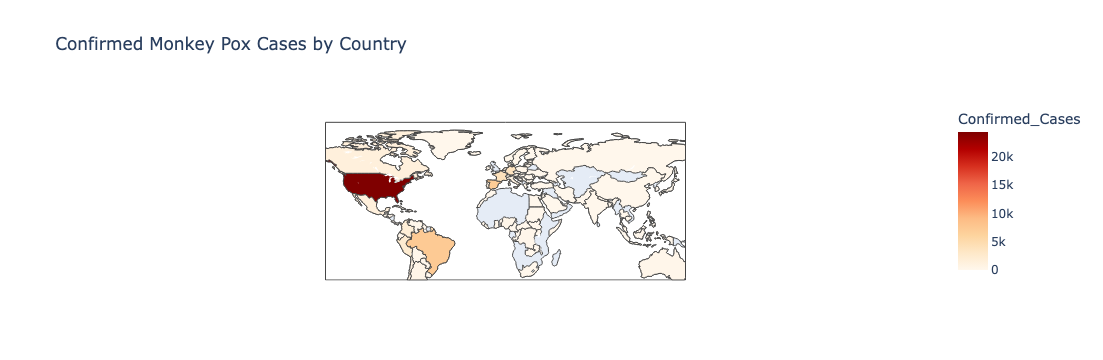

In [50]:
# Create basic choropleth map
fig = px.choropleth(df_monkey_pox_cases,
                    locations="Country",          # Colonne avec les noms des pays
                    locationmode="country names", # Mode pour identifier les pays par nom
                    color="Confirmed_Cases",      # Colonne pour le gradient de couleur
                    hover_name="Country",         # Texte à afficher au survol
                    color_continuous_scale="OrRd",# Palette de couleurs
                    title="Confirmed Monkey Pox Cases by Country")

# Afficher la carte
fig.show()